In [31]:
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from torch_geometric.loader import DataLoader
from CustomDataset import CustomDataset

%config InlineBackend.figure_format = 'png2x'
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5    # Axis line width
plt.rcParams['lines.linewidth'] = 1    # Line width
plt.rcParams['xtick.major.width'] = 0.5  # Set x major tick width to 2 points
plt.rcParams['ytick.major.width'] = 0.5
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### Read ground truth and prediction

In [32]:
nt = 12

num_zones = 3

num_data = 200

# Ground truth
agg_PG_true = np.zeros((num_data, num_zones+1, nt))
agg_PG_pred = np.zeros((num_data, num_zones+1, nt))

# Read ground truth and prediction
for i in range(num_data):
    file_path  =f'../../res/IEEE_Case118/model_evaluation/agg_PG/true/true_{i+1}.csv'
    ground_truth = pd.read_csv(file_path, header=None, index_col=None)
    agg_PG_true[i, :, :] = ground_truth.values.copy()

    file_path  =f'../../res/IEEE_Case118/model_evaluation/agg_PG/pred/pred_{i+1}.csv'
    pred = pd.read_csv(file_path, header=None, index_col=None)
    agg_PG_pred[i, :, :] = pred.values.copy()

## One-on-one comparison

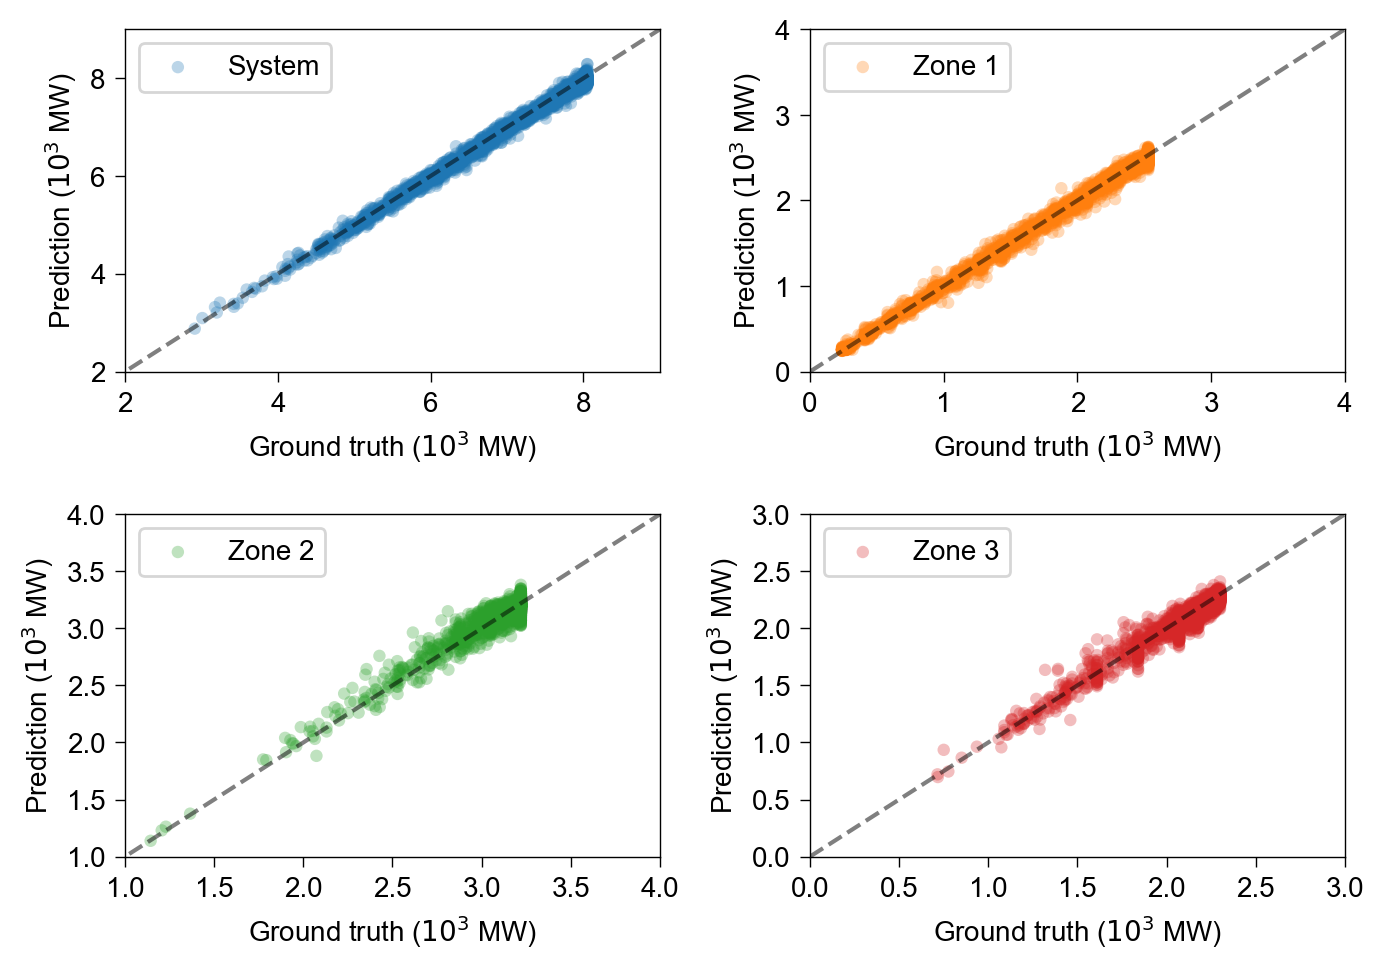

In [33]:
# System-level
fig = plt.figure(figsize=(7, 5))
x = np.linspace(0, 10, 100)
y = x
ax1 = fig.add_subplot(221)
ax1.plot(x, y, 'k--', linewidth=1.5, alpha=0.5)
ax1.scatter(agg_PG_true[:, 0, :].flatten()/1000, agg_PG_pred[:, 0, :].flatten()/1000, 
            s=20, c=colors[0], marker='o', edgecolors='none', alpha=0.3, label='System')
ax1.set_xlim((2, 9))
ax1.set_ylim((2, 9))
ax1.set_xlabel('Ground truth ($10^3$ MW)')
ax1.set_ylabel('Prediction ($10^3$ MW)')
ax1.legend(loc='upper left')

# Zone 1
x = np.linspace(0, 10, 100)
y = x
ax2 = fig.add_subplot(222)
ax2.plot(x, y, 'k--', linewidth=1.5, alpha=0.5)
ax2.scatter(agg_PG_true[:, 1, :].flatten()/1000, agg_PG_pred[:, 1, :].flatten()/1000, 
            s=20, c=colors[1], marker='o', edgecolors='none', alpha=0.3, label='Zone 1')
ax2.set_xlim((0, 4))
ax2.set_ylim((0, 4))
ax2.set_xlabel('Ground truth ($10^3$ MW)')
ax2.set_ylabel('Prediction ($10^3$ MW)')
ax2.legend(loc='upper left')

# Zone 2
x = np.linspace(0, 10, 100)
y = x
ax3 = fig.add_subplot(223)
ax3.plot(x, y, 'k--', linewidth=1.5, alpha=0.5)
ax3.scatter(agg_PG_true[:, 2, :].flatten()/1000, agg_PG_pred[:, 2, :].flatten()/1000, 
            s=20, c=colors[2], marker='o', edgecolors='none', alpha=0.3, label='Zone 2')
ax3.set_xlim((1, 4))
ax3.set_ylim((1, 4))
ax3.set_xlabel('Ground truth ($10^3$ MW)')
ax3.set_ylabel('Prediction ($10^3$ MW)')
ax3.legend(loc='upper left')

# Zone 3
x = np.linspace(0, 10, 100)
y = x
ax4 = fig.add_subplot(224)
ax4.plot(x, y, 'k--', linewidth=1.5, alpha=0.5)
ax4.scatter(agg_PG_true[:, 3, :].flatten()/1000, agg_PG_pred[:, 3, :].flatten()/1000, 
            s=20, c=colors[3], marker='o', edgecolors='none', alpha=0.3, label='Zone 3')
ax4.set_xlim((0, 3))
ax4.set_ylim((0, 3))
ax4.set_xlabel('Ground truth ($10^3$ MW)')
ax4.set_ylabel('Prediction ($10^3$ MW)')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()
plt.close('all')

## Calculate MRE

In [34]:
rela_err = (agg_PG_true - agg_PG_pred) / agg_PG_true * 100
MRE = np.mean(np.abs(rela_err), axis=0)

## Testing data variation

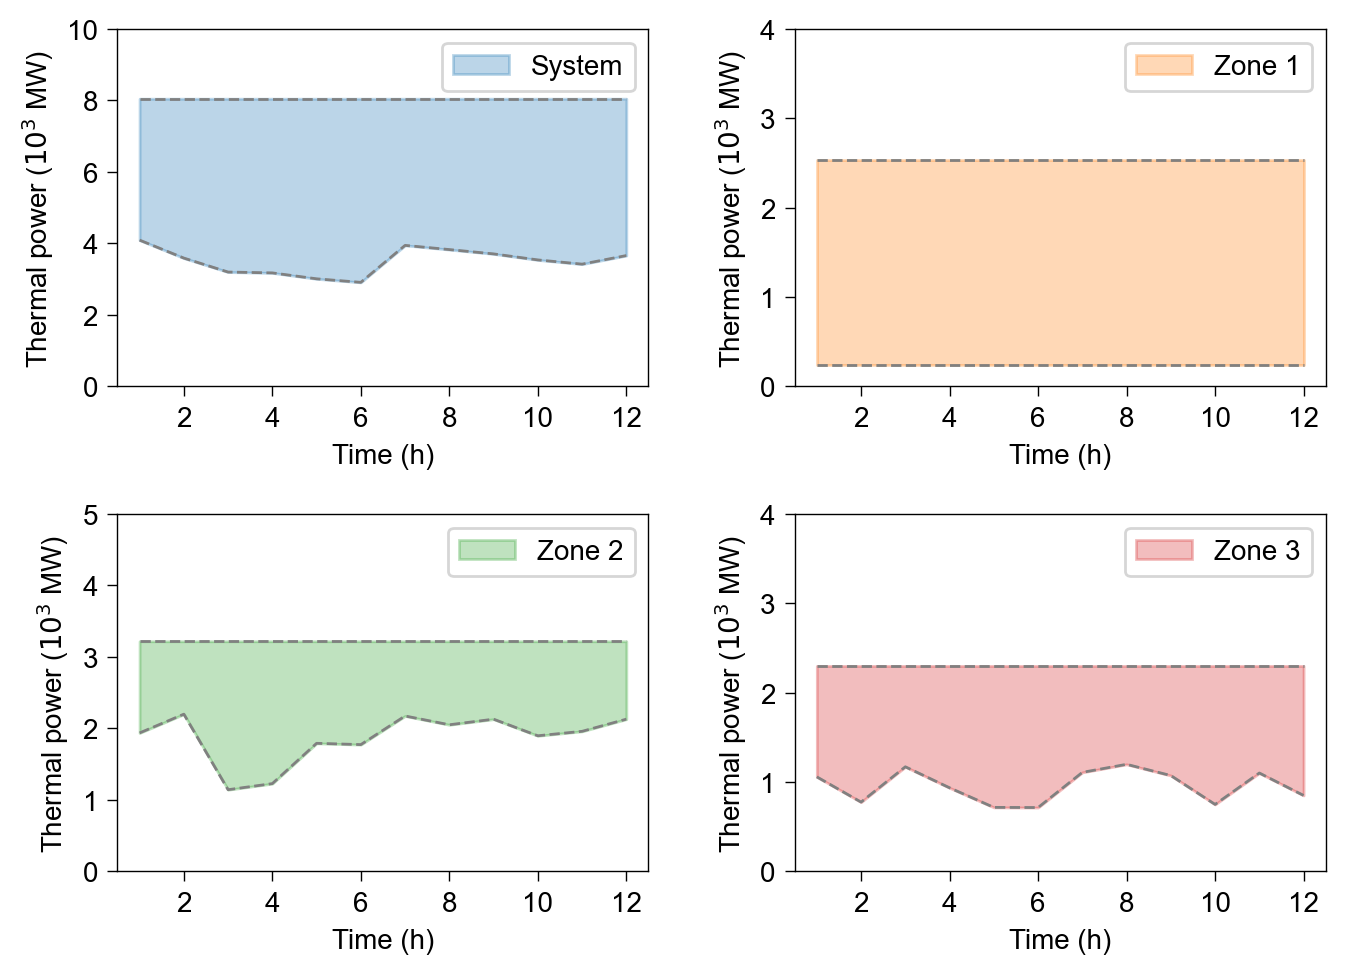

In [35]:
# Plot system-level results
fig = plt.figure(figsize=(7, 5))

ax1 = fig.add_subplot(221)
ax1.plot(np.arange(1, 13), agg_PG_true[:, 0, :].min(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax1.plot(np.arange(1, 13), agg_PG_true[:, 0, :].max(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax1.fill_between(np.arange(1, 13), agg_PG_true[:, 0, :].min(axis=0)/1000, agg_PG_true[:, 0, :].max(axis=0)/1000, 
                 color=colors[0], alpha=0.3, label='System')
ax1.set_xlim((0.5, 12.5))
ax1.set_ylim((0, 10))
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Thermal power ($10^3$ MW)')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(222)
ax2.plot(np.arange(1, 13), agg_PG_true[:, 1, :].min(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax2.plot(np.arange(1, 13), agg_PG_true[:, 1, :].max(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax2.fill_between(np.arange(1, 13), agg_PG_true[:, 1, :].min(axis=0)/1000, agg_PG_true[:, 1, :].max(axis=0)/1000, 
                 color=colors[1], alpha=0.3, label='Zone 1')
ax2.set_xlim((0.5, 12.5))
ax2.set_ylim((0, 4))
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Thermal power ($10^3$ MW)')
ax2.legend(loc='upper right')

ax3 = fig.add_subplot(223)
ax3.plot(np.arange(1, 13), agg_PG_true[:, 2, :].min(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax3.plot(np.arange(1, 13), agg_PG_true[:, 2, :].max(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax3.fill_between(np.arange(1, 13), agg_PG_true[:, 2, :].min(axis=0)/1000, agg_PG_true[:, 2, :].max(axis=0)/1000, 
                 color=colors[2], alpha=0.3, label='Zone 2')
ax3.set_xlim((0.5, 12.5))
ax3.set_ylim((0, 5))
ax3.set_xlabel('Time (h)')
ax3.set_ylabel('Thermal power ($10^3$ MW)')
ax3.legend(loc='upper right')


ax4 = fig.add_subplot(224)
ax4.plot(np.arange(1, 13), agg_PG_true[:, 3, :].min(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax4.plot(np.arange(1, 13), agg_PG_true[:, 3, :].max(axis=0)/1000, linestyle='--', linewidth=1, color='gray')
ax4.fill_between(np.arange(1, 13), agg_PG_true[:, 3, :].min(axis=0)/1000, agg_PG_true[:, 3, :].max(axis=0)/1000, 
                 color=colors[3], alpha=0.3, label='Zone 3')
ax4.set_xlim((0.5, 12.5))
ax4.set_ylim((0, 4))
ax4.set_xlabel('Time (h)')
ax4.set_ylabel('Thermal power ($10^3$ MW)')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()
plt.close('all')

## Zone-level MRE

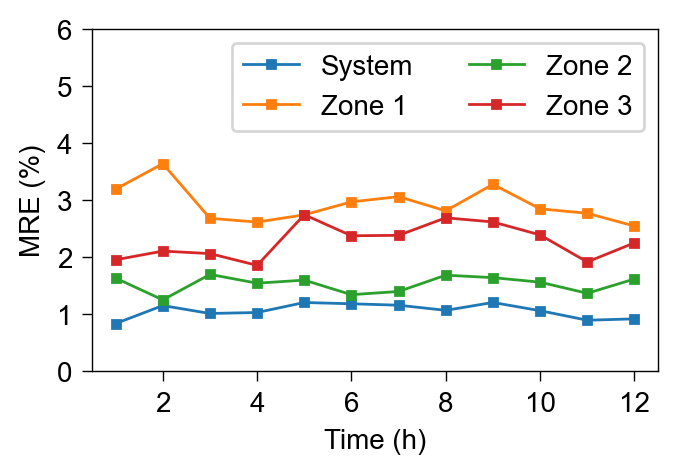

In [36]:
fig = plt.figure(figsize=(3.5, 2.5))

ax = fig.add_subplot(111)
ax.plot(np.arange(1, 13), MRE[0, :], linewidth=1, marker='s', markersize=3, label='System')
ax.plot(np.arange(1, 13), MRE[1, :], linewidth=1, marker='s', markersize=3, label='Zone 1')
ax.plot(np.arange(1, 13), MRE[2, :], linewidth=1, marker='s', markersize=3, label='Zone 2')
ax.plot(np.arange(1, 13), MRE[3, :], linewidth=1, marker='s', markersize=3, label='Zone 3')
ax.set_xlabel('Time (h)')
ax.set_ylabel('MRE (%)')
ax.set_xlim((0.5, 12.5))
ax.set_ylim(0, 6)
ax.legend(ncols=2)

plt.tight_layout()
plt.show()
plt.close('all')